### Imports and Installations

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Analyze output of actuated simulation 
Timesteps 25200 - 34200

In [38]:
pd.set_option('display.max_columns', None)

In [39]:
df = pd.read_csv('../src/data/actuated_output/actuated_output_9000steps_moreInfo.csv')
df

,Step,num_vehicles,vehicle_types,avg_speed,localCO2Emission,localCOEmission,localHCEmission,localPMxEmission,localNOxEmission,local_fuel_consumption,localNoiseEmission,localWaitingTime,localStoppedVehicles,totalCO2Emission,totalCOEmission,totalHCEmission,totalPMxEmission,totalNOxEmission,totalFuelConsumption,totalNoiseEmission,totalWaitingTime,totalStoppedVehicles,tls159_phase,tls159_phase_duration,tls159_state,tls160_phase,tls160_phase_duration,tls160_state,tls161_phase,tls161_phase_duration,tls161_state
0,25200,0,[],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,1.123389e+04,359.172222,1.453889,2.442333,86.401389,3.550833e+03,178.991223,0.0,4,0,19.0,GGGgrrrrrrgGgGGrrrGG,0,19.0,rgGgGrrrrrrrrrrrGGrGGrG,11,48.0,ggggggggggrrrrrrrrrrgrg
1,25201,0,[],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,2.186324e+04,666.801335,3.018414,2.957748,97.425541,6.936337e+03,271.159876,0.0,1,0,19.0,GGGgrrrrrrgGgGGrrrGG,0,19.0,rgGgGrrrrrrrrrrrGGrGGrG,11,48.0,ggggggggggrrrrrrrrrrgrg
2,25202,0,[],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,3.250170e+04,924.722737,4.318140,3.586446,120.598029,1.031744e+04,335.695376,0.0,1,0,19.0,GGGgrrrrrrgGgGGrrrGG,0,19.0,rgGgGrrrrrrrrrrrGGrGGrG,11,48.0,ggggggggggrrrrrrrrrrgrg
3,25203,0,[],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,5.051227e+04,1100.544598,5.200979,6.431233,241.016657,1.601038e+04,463.885510,1.0,3,0,19.0,GGGgrrrrrrgGgGGrrrGG,0,19.0,rgGgGrrrrrrrrrrrGGrGGrG,11,48.0,ggggggggggrrrrrrrrrrgrg
4,25204,0,[],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,5.705453e+04,1113.852123,5.385111,6.785382,271.569370,1.807950e+04,530.103937,1.0,3,0,19.0,GGGgrrrrrrgGgGGrrrGG,0,19.0,rgGgGrrrrrrrrrrrGGrGGrG,11,48.0,ggggggggggrrrrrrrrrrgrg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,34195,52,"['tram', 'truck_truck', 'DEFAULT_VEHTYPE', 'DE...",0.181145,194300.309894,6498.118625,30.343889,30.414016,1135.241915,61541.781705,602.188689,10518.0,50,1.035623e+07,298932.382590,1492.915635,1543.197178,59286.595645,3.280027e+06,153152.623377,285478.0,2356,9,5.0,rrrrrrrrggrrrrrrrrrr,9,6.0,Grrrrrrrrrrrrrrrrrrrrrr,6,4.0,rrrrrrrrrrrrrrrrrryyrrr
8996,34196,53,"['tram', 'DEFAULT_VEHTYPE', 'truck_truck', 'DE...",0.247139,195624.565105,6598.860550,30.896463,30.197247,1118.704758,61973.963843,601.374697,10568.0,50,1.026276e+07,299508.798829,1484.959727,1522.649404,58323.239028,3.250658e+06,153236.806372,286899.0,2369,9,5.0,rrrrrrrrggrrrrrrrrrr,9,6.0,Grrrrrrrrrrrrrrrrrrrrrr,6,4.0,rrrrrrrrrrrrrrrrrryyrrr
8997,34197,53,"['tram', 'DEFAULT_VEHTYPE', 'truck_truck', 'DE...",0.225469,178850.217767,6577.795503,30.872759,27.146556,977.740806,56690.937989,590.879707,10317.0,49,1.002934e+07,298550.299521,1494.417203,1494.745823,56836.189267,3.177041e+06,153126.254984,288079.0,2383,10,3.0,rrrrrrrryyrrrrrrrrrr,10,3.0,yrrrrrrrrrrrrrrrrrrrrrr,6,4.0,rrrrrrrrrrrrrrrrrryyrrr
8998,34198,53,"['tram', 'DEFAULT_VEHTYPE', 'truck_truck', 'DE...",0.212102,183281.244519,6660.068031,31.349939,27.222564,979.589268,58104.239534,592.245318,10067.0,49,1.000221e+07,297833.825881,1488.489231,1500.619033,56989.616427,3.168340e+06,153076.399943,288953.0,2385,10,3.0,rrrrrrrryyrrrrrrrrrr,10,3.0,yrrrrrrrrrrrrrrrrrrrrrr,6,4.0,rrrrrrrrrrrrrrrrrryyrrr


In [40]:
# drop all rows that do not contain any vehicles on the controlled lanes
df = df[df['num_vehicles'] != 0]

In [64]:
df

,Step,num_vehicles,vehicle_types,avg_speed,localCO2Emission,localCOEmission,localHCEmission,localPMxEmission,localNOxEmission,local_fuel_consumption,localNoiseEmission,localWaitingTime,localStoppedVehicles,totalCO2Emission,totalCOEmission,totalHCEmission,totalPMxEmission,totalNOxEmission,totalFuelConsumption,totalNoiseEmission,totalWaitingTime,totalStoppedVehicles,tls159_phase,tls159_phase_duration,tls159_state,tls160_phase,tls160_phase_duration,tls160_state,tls161_phase,tls161_phase_duration,tls161_state
55,25255,1,['truck_truck'],12.838608,17645.615158,25.612431,0.000000,3.119432,150.140131,5550.657738,75.575247,0.0,0,3.988732e+05,5371.604223,27.320515,44.806304,1956.442650,1.263394e+05,4804.645310,221.0,17,6,5.0,rrrrgGGGrrrrrrrGrrrr,6,19.0,grrrrrGGgGGgrrrrrGGrrGG,2,9.0,rrrrrrrrrrrrrrrrrrrrrrr
56,25256,1,['truck_truck'],12.508273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.535690,0.0,0,3.700758e+05,4423.266115,22.106924,46.504589,2038.796474,1.171140e+05,4823.847569,229.0,16,6,5.0,rrrrgGGGrrrrrrrGrrrr,6,19.0,grrrrrGGgGGgrrrrrGGrrGG,2,9.0,rrrrrrrrrrrrrrrrrrrrrrr
57,25257,1,['truck_truck'],12.407087,10954.495837,18.209641,0.000000,2.322919,98.369186,3445.743227,74.272800,0.0,0,4.132732e+05,5268.394097,26.277820,52.790957,2237.074990,1.308127e+05,4986.688323,244.0,17,6,5.0,rrrrgGGGrrrrrrrGrrrr,6,19.0,grrrrrGGgGGgrrrrrGGrrGG,2,9.0,rrrrrrrrrrrrrrrrrrrrrrr
58,25258,1,['truck_truck'],12.698172,20829.061079,29.161285,0.000000,3.507232,175.173691,6552.123116,76.035101,0.0,0,3.940863e+05,4615.650986,22.781477,48.662620,2191.535806,1.246773e+05,5053.822101,260.0,18,6,5.0,rrrrgGGGrrrrrrrGrrrr,6,19.0,grrrrrGGgGGgrrrrrGGrrGG,2,9.0,rrrrrrrrrrrrrrrrrrrrrrr
59,25259,1,['truck_truck'],10.493584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.225200,0.0,0,4.065014e+05,4946.208272,24.898130,48.348796,2129.362129,1.286845e+05,5073.207207,277.0,17,6,5.0,rrrrgGGGrrrrrrrGrrrr,6,19.0,grrrrrGGgGGgrrrrrGGrrGG,2,9.0,rrrrrrrrrrrrrrrrrrrrrrr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,34195,52,"['tram', 'truck_truck', 'DEFAULT_VEHTYPE', 'DE...",0.181145,194300.309894,6498.118625,30.343889,30.414016,1135.241915,61541.781705,602.188689,10518.0,50,1.035623e+07,298932.382590,1492.915635,1543.197178,59286.595645,3.280027e+06,153152.623377,285478.0,2356,9,5.0,rrrrrrrrggrrrrrrrrrr,9,6.0,Grrrrrrrrrrrrrrrrrrrrrr,6,4.0,rrrrrrrrrrrrrrrrrryyrrr
8996,34196,53,"['tram', 'DEFAULT_VEHTYPE', 'truck_truck', 'DE...",0.247139,195624.565105,6598.860550,30.896463,30.197247,1118.704758,61973.963843,601.374697,10568.0,50,1.026276e+07,299508.798829,1484.959727,1522.649404,58323.239028,3.250658e+06,153236.806372,286899.0,2369,9,5.0,rrrrrrrrggrrrrrrrrrr,9,6.0,Grrrrrrrrrrrrrrrrrrrrrr,6,4.0,rrrrrrrrrrrrrrrrrryyrrr
8997,34197,53,"['tram', 'DEFAULT_VEHTYPE', 'truck_truck', 'DE...",0.225469,178850.217767,6577.795503,30.872759,27.146556,977.740806,56690.937989,590.879707,10317.0,49,1.002934e+07,298550.299521,1494.417203,1494.745823,56836.189267,3.177041e+06,153126.254984,288079.0,2383,10,3.0,rrrrrrrryyrrrrrrrrrr,10,3.0,yrrrrrrrrrrrrrrrrrrrrrr,6,4.0,rrrrrrrrrrrrrrrrrryyrrr
8998,34198,53,"['tram', 'DEFAULT_VEHTYPE', 'truck_truck', 'DE...",0.212102,183281.244519,6660.068031,31.349939,27.222564,979.589268,58104.239534,592.245318,10067.0,49,1.000221e+07,297833.825881,1488.489231,1500.619033,56989.616427,3.168340e+06,153076.399943,288953.0,2385,10,3.0,rrrrrrrryyrrrrrrrrrr,10,3.0,yrrrrrrrrrrrrrrrrrrrrrr,6,4.0,rrrrrrrrrrrrrrrrrryyrrr


In [42]:
df[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].mean()

localCO2Emission          161659.538171
localCOEmission             4932.733414
localHCEmission               24.395986
localPMxEmission              26.341775
localNOxEmission             982.120171
localNoiseEmission           558.671151
local_fuel_consumption     51194.174864
dtype: float64

In [63]:
df['totalCO2Emission'].mean()

6225563.042900596

### Phase Transitions

In [65]:
# Define the possible states for each traffic light
tls_159_states = ["GGGgrrrrrrgGgGGrrrGG",
        "GGGgrrrrrrgGgGGrrrrr",
        "yyygrrrrrryyyyyrrrrr",
        "GGGGrrrrrrrrrrrrrrrr",
        "yyyyrrrrrrrrrrrrrrrr",
        "rrrrgGGGrrrrrrrGGGrG",
        "rrrrgGGGrrrrrrrGrrrr",
        "rrrryyyyrrrrrrryrrrr",
        "rrrrrrrrggrrrrrrGGGr",
        "rrrrrrrrggrrrrrrrrrr",
        "rrrrrrrryyrrrrrrrrrr"]

tls_160_states = ["rgGgGrrrrrrrrrrrGGrGGrG",
        "rgGgGrrrrrrrrrrrrrrrrrr",
        "ryyyyrrrrrrrrrrrrrrrrrr",
        "rrrrrgrrrrrrggGGGGGrGGr",
        "rrrrrgrrrrrrggGGrrrrrrr",
        "rrrrryrrrrrryyyyrrrrrrr",
        "grrrrrGGgGGgrrrrrGGrrGG",
        "grrrrrGGgGGgrrrrrrrrrrr",
        "grrrrryyyyyyrrrrrrrrrrr",
        "Grrrrrrrrrrrrrrrrrrrrrr",
        "yrrrrrrrrrrrrrrrrrrrrrr"]

tls_161_states = ["yyyyyyryyyrrrrrrrrrrrry",
        "rrrrrrrrrrrrrrrrrrrrrry",
        "rrrrrrrrrrrrrrrrrrrrrrr",
        "ggggggggggrrggggggggggg",
        "rrrrrrryrryyrrrrrryyrrr",
        "rrrrrrrgrrggrrrrrrggrrr",
        "rrrrrrrrrrrrrrrrrryyrrr",
        "rrrrrrrrrrrrrrrrrrrrrrr",
        "yyyyyyyryyrrrrrrrrrrgrr",
        "gggggggrggrrrrrrrrrrgrr",
        "ggggggggggrrrrrrrrrrgry",
        "ggggggggggrrrrrrrrrrgrg",
        "ggggggyryyrrrrrrrrrrrrg",
        "yyyyyyrrrrrrrrrrrrrrrrg",
        "yyyyyyrrrrrrrrrrrrrrrry"]

In [50]:
df.tls159_state.unique()

array(['rrrrgGGGrrrrrrrGrrrr', 'rrrryyyyrrrrrrryrrrr',
       'rrrrrrrrggrrrrrrGGGr', 'rrrrrrrrggrrrrrrrrrr',
       'rrrrrrrryyrrrrrrrrrr', 'GGGgrrrrrrgGgGGrrrGG',
       'GGGgrrrrrrgGgGGrrrrr', 'yyygrrrrrryyyyyrrrrr',
       'GGGGrrrrrrrrrrrrrrrr', 'rrrrgGGGrrrrrrrGGGrG',
       'yyyyrrrrrrrrrrrrrrrr'], dtype=object)

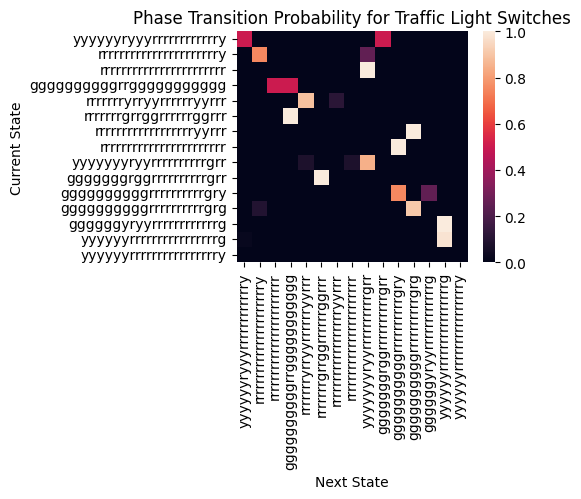

In [79]:
# create transition matrix and plot heatmap

tls_list = ['tls159_state', 'tls160_state', 'tls161_state']

for tls in tls_list:

    def transition_matrix(transitions, num_phases):
        phases = list(set(phase for transition in transitions for phase in transition))
        phase_to_index = {phase: index for index, phase in enumerate(phases)}
        matrix = [[0] * num_phases for _ in range(num_phases)]
        for (phase1, phase2) in transitions:
            i = phase_to_index[phase1]
            j = phase_to_index[phase2]
            matrix[i][j] += 1
        return matrix

    def normalize_matrix(matrix):
            for row in matrix:
                total = sum(row)
                if total > 0:  # Avoid division by zero
                    row[:] = [f/total for f in row]
            return matrix

    def create_heatmap(matrix, states):
        plt.figure(figsize=(4, 3))  # adjust the size as needed
        sns.heatmap(matrix,square=True, xticklabels=states, yticklabels=states)
        plt.xlabel("Next State")
        plt.ylabel("Current State")
        plt.title("Phase Transition Probability for Traffic Light Switches")
        plt.show()

    # append all states collected during training to list
    tls_allStates = df['tls161_state'].tolist()
    #tls_allStates.append(x for x in tls_161_states if x not in tls_allStates)

    # get number of distinct phases
    num_phases = len(tls_161_states)

    # create list of tuples for state transitions
    transitions = [(tls_allStates[i], tls_allStates[i+1]) for i in range(len(tls_allStates)-1)]

    # create transition matrix
    matrix = transition_matrix(transitions, num_phases)

    # normalize matrix
    transition_matrix = normalize_matrix(matrix)  # assuming you already have the transition matrix

    # plot heatmap
    create_heatmap(transition_matrix, tls_161_states)

### Polar Plot for Time Spent in States

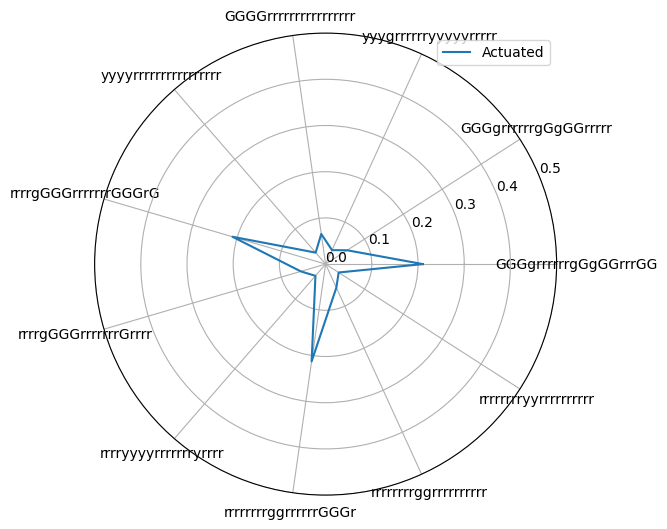

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# List of dataframes and corresponding policies
configs = [(df, 'Actuated')]

states = tls_159_states

# Create a figure
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Create the angles for the polar plot
angles = np.linspace(0, 2 * np.pi, len(states), endpoint=False).tolist()

# Make the plot circular
angles += angles[:1]

# Iterate over the configurations
for df, policy in configs:
    # Calculate the time spent in each state
    time_in_state = df['tls159_state'].value_counts()

    # Normalize the values to range from 0 to 1
    values = [time_in_state.get(state, 0) / time_in_state.values.sum() for state in states]

    # Repeat the first value to close the circular plot
    values += values[:1]

    # Plot the data for the current configuration
    ax.plot(angles, values, label=policy)

# Add a legend
ax.legend(loc='upper right')

# Set ytick labels as decimals and limit the scale to 0.5
yticks = np.linspace(0, 0.5, num=6)
ax.set_yticks(yticks)
ax.set_yticklabels(['{:.1f}'.format(y) for y in yticks])

# Set xtick labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(states)

# Limit the radial axis to 0.5
ax.set_ylim(0, 0.5)

plt.show()


In [73]:
time_in_state

rrrrrrrrggrrrrrrGGGr    1900
GGGgrrrrrrgGgGGrrrGG    1881
rrrrgGGGrrrrrrrGGGrG    1878
GGGGrrrrrrrrrrrrrrrr     589
rrrrgGGGrrrrrrrGrrrr     500
rrrrrrrrggrrrrrrrrrr     500
GGGgrrrrrrgGgGGrrrrr     495
rrrryyyyrrrrrrryrrrr     300
rrrrrrrryyrrrrrrrrrr     300
yyygrrrrrryyyyyrrrrr     297
yyyyrrrrrrrrrrrrrrrr     294
Name: tls159_state, dtype: int64